## **Data mining final project**

### **寶可夢數值預測**
- 利用名字、屬性預測其種族值
  - 特徵
    - 名字
    - 種族1
    - 種族2
  - 目標
    - 種族值

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
pokemon = pd.read_csv('pokedex.csv', encoding='big5')

pokemon

,Image,Index,English Name,Chinese name,Normal,Fighting,Flying,Poison,Ground,Rock,...,Dark,Fairy,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed,Legendary
0,images/1.png,1,Bulbasaur,妙蛙種子,0,0,0,1,0,0,...,0,0,318,45,49,49,65,65,45,0
1,images/2.png,2,Ivysaur,妙蛙草,0,0,0,1,0,0,...,0,0,405,60,62,63,80,80,60,0
2,images/3.png,3,Venusaur,妙蛙花,0,0,0,1,0,0,...,0,0,525,80,82,83,100,100,80,0
3,images/4.png,3,Mega Venusaur,MEGA妙蛙花,0,0,0,1,0,0,...,0,0,625,80,100,123,122,120,80,0
4,images/5.png,4,Charmander,小火龍,0,0,0,0,0,0,...,0,0,309,39,52,43,60,50,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,images/1211.png,1023,Iron Crown,鐵頭殼,0,0,0,0,0,0,...,0,0,590,90,72,100,122,108,98,1
1211,images/1212.png,1024,Terapagos Normal Form,太樂巴戈斯 普通形態,1,0,0,0,0,0,...,0,0,450,90,65,85,65,85,60,1
1212,images/1213.png,1024,Terapagos Terastal Form,太樂巴戈斯 太晶形態,1,0,0,0,0,0,...,0,0,600,95,95,110,105,110,85,1
1213,images/1214.png,1024,Terapagos Stellar Form,太樂巴戈斯 星晶形態,1,0,0,0,0,0,...,0,0,700,160,105,110,130,110,85,1


### **XGBoost**
##### **Use English name, Type1, Type2, Legendary to predict 6 value ( HP, attack defence, sp.atk, sp.def, speed )**
##### **Use Grid Search to find the hyper paremeter for each XGBoost predict model**
HP:
  Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 10.0, 'subsample': 0.8}

Attack:
  Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'subsample': 0.8}

Defense:
  Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1.0, 'subsample': 0.6}

SP. Atk.:
  Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'subsample': 0.8}

SP. Def:
  Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.6}

Speed:
  Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.6}

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# 編碼 English Name 欄位
label_encoder = LabelEncoder()
pokemon['English Name Encoded'] = label_encoder.fit_transform(pokemon['English Name'])

# 確保所有特徵都是數值型
features = [col for col in pokemon.columns if col not in [
    'Image', 'Index', 'English Name', 'Chinese name', 'Total',
    'HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed', 'Legendary'
]]

# 確保特徵全為數值型
X = pokemon[features]
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# 定義目標值
targets = ['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']

# 每個目標值的最佳參數
best_params_per_target = {
    'HP': {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 10.0, 'subsample': 0.8},
    'Attack': {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'subsample': 0.8},
    'Defense': {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1.0, 'subsample': 0.6},
    'SP. Atk.': {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'subsample': 0.8},
    'SP. Def': {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.6},
    'Speed': {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.6}
}

# 儲存結果
xgb_final_results = {}

# 使用最佳參數進行預測
for target in targets:
    y = pokemon[target].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # 分割資料集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 使用對應的最佳參數初始化 XGBoost 模型
    best_params = best_params_per_target[target]
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
    xgb_model.fit(X_train, y_train)
    
    # 預測與評估
    y_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # 儲存結果
    xgb_final_results[target] = {
        'rmse': rmse,
        'predictions': y_pred[:5]  # 儲存前五個預測值
    }

# 輸出結果
for target, result in xgb_final_results.items():
    print(f"{target}:")
    print(f"  Root Mean Squared Error: {result['rmse']:.2f}")
    print(f"  Predictions: {result['predictions']}")
    print()


HP:
  Root Mean Squared Error: 22.57
  Predictions: [76.15513  72.59458  69.34144  69.984215 85.807076]

Attack:
  Root Mean Squared Error: 30.48
  Predictions: [82.46661 77.80936 64.50413 73.37535 74.20354]

Defense:
  Root Mean Squared Error: 28.21
  Predictions: [73.613976 69.31342  63.30112  67.14781  61.372322]

SP. Atk.:
  Root Mean Squared Error: 27.77
  Predictions: [60.310413 98.793594 65.72345  72.06292  61.11575 ]

SP. Def:
  Root Mean Squared Error: 25.57
  Predictions: [67.45473 79.09104 69.93683 70.89569 68.95411]

Speed:
  Root Mean Squared Error: 28.43
  Predictions: [63.194744 77.35519  70.03602  71.51669  63.83572 ]



### **Kmeans**

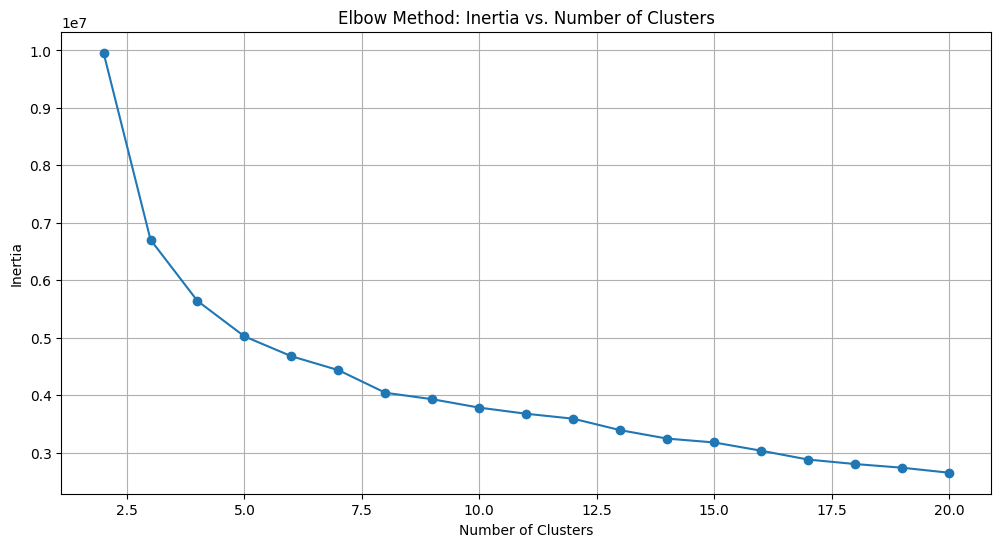

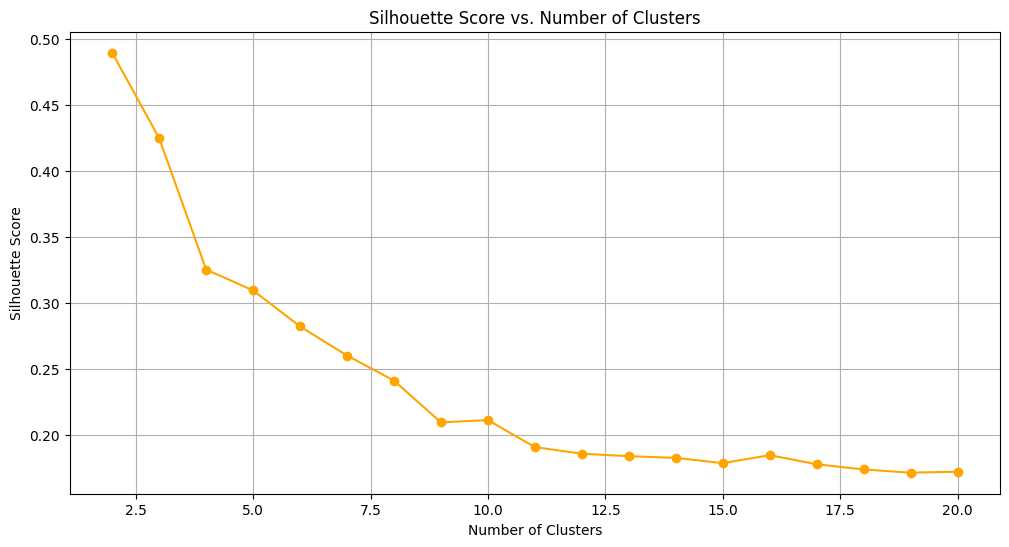

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Step 1: Load data
file_path = 'pokedex.csv'  # Replace with your file path
pokedex_data = pd.read_csv(file_path, encoding='big5')

# Step 2: Prepare features and target
attribute_columns = ['Normal', 'Fighting', 'Flying', 'Poison', 'Ground', 'Rock', 'Bug', 
                     'Ghost', 'Steel', 'Water', 'Fire', 'Grass', 'Electric', 'Psychic', 
                     'Ice', 'Dragon', 'Dark', 'Fairy']

def select_primary_attribute(row):
    for col in attribute_columns:
        if row[col] == 1:
            return col
    return None

pokedex_data['Primary Attribute'] = pokedex_data[attribute_columns].apply(select_primary_attribute, axis=1)
label_encoder = LabelEncoder()
pokedex_data['Primary Attribute Encoded'] = label_encoder.fit_transform(pokedex_data['Primary Attribute'])

features = ['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed', 'Total', 'Legendary']
X = pokedex_data[features]
y = pokedex_data['Primary Attribute Encoded']

# Step 3: Elbow method to determine optimal number of clusters
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 21)  # Adjust range if necessary

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot Elbow Method (Inertia)
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method: Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


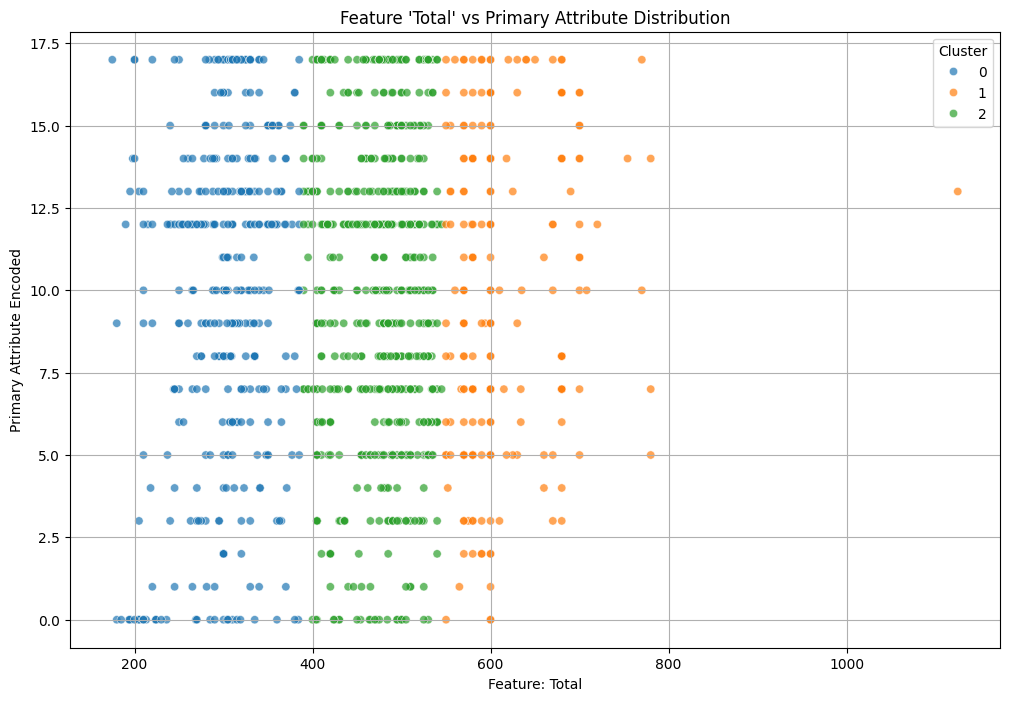

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
# features = ['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed', 'Total', 'Legendary']
# Step 5: Visualize distribution based on features and primary attribute
def plot_feature_vs_target(X, y, cluster_labels, title="Feature vs Target Distribution"):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=X['Total'],  # Replace 'Total' with the desired feature for X-axis
        y=y,  # Y-axis: encoded target labels
        hue=cluster_labels,  # Color based on cluster labels
        palette="tab10",
        legend="full",
        alpha=0.7
    )
    plt.title(title)
    plt.xlabel("Feature: Total")  # Update with the chosen feature name
    plt.ylabel("Primary Attribute Encoded")
    plt.legend(title="Cluster")
    plt.grid()
    plt.show()

# Step 4: Apply KMeans with optimal clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Plot using 'Total' as an example feature
plot_feature_vs_target(X, pokedex_data['Primary Attribute Encoded'], cluster_labels, title="Feature 'Total' vs Primary Attribute Distribution")




### **XGBoost**
##### **Use 6 value ( HP, attack defence, sp.atk, sp.def, speed ), English name and Legendary to classify Type1**